In [121]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
from scipy.spatial import distance
from scipy.stats import ks_2samp
from math import inf

from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [183]:
path = "C:\\Users\\Vitaliy\\OneDrive\\Рабочий стол\\VK_DS"
train = pd.read_csv(f"{path}\\train.csv")
train2 = pd.read_csv(f"{path}\\train.csv")
test = pd.read_csv(f"{path}\\test.csv")
train2 = pd.read_csv(f"{path}\\train.csv")
train

,id,lat,lon,score
0,0,56.228300,43.945535,0.080523
1,1,56.834244,53.141543,0.104424
2,2,45.042299,41.990170,0.067615
3,3,59.849408,30.387762,0.088038
4,4,59.839643,30.304308,0.099686
...,...,...,...,...
3079,3079,55.674584,37.279505,0.531557
3080,3080,55.784909,49.188791,0.101631
3081,3081,55.118828,61.462996,0.125265
3082,3082,55.649052,37.533877,0.322601


In [4]:
features = pd.read_csv(f"{path}\\features.csv")
features

,lat,lon,0,1,2,3,4,5,6,7,...,353,354,355,356,357,358,359,360,361,362
0,59.837100,30.262701,0.411159,0.360032,0.350883,0.476389,0.373542,0.399907,0.397579,0.486442,...,0.041906,0.045916,0.085368,0.093044,0.014491,0.004091,0.043260,0.045916,0.060025,0.071592
1,59.935705,30.274201,0.500628,0.458489,0.522933,0.538892,0.482807,0.497257,0.541007,0.482956,...,0.041262,0.054171,0.066940,0.057510,0.007990,0.017897,0.042617,0.054171,0.047068,0.044251
2,59.929714,30.419863,0.450037,0.413593,0.445300,0.490658,0.403224,0.448099,0.516285,0.526028,...,0.044056,0.052290,0.126482,0.116896,0.006771,0.007329,0.045406,0.052290,0.088934,0.089945
3,56.111227,40.356119,0.160964,0.146153,0.301632,0.196871,0.157927,0.130723,0.246422,0.385300,...,0.043072,0.051181,0.042962,0.030555,0.010293,0.002216,0.044425,0.051181,0.030208,0.023510
4,56.233351,43.872728,0.102522,0.073835,0.270109,0.129343,0.106780,0.082463,0.201381,0.372377,...,0.047839,0.048137,0.135698,0.163684,0.009615,0.003579,0.049185,0.048137,0.095414,0.125946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3696,55.491370,37.308973,0.603469,0.427283,0.616920,0.787331,0.585380,0.572505,0.414610,0.439459,...,0.040365,0.049803,0.115943,0.086169,0.003115,0.002045,0.041721,0.049803,0.081524,0.066302
3697,55.752230,52.410299,0.111785,0.105864,0.223382,0.120843,0.107082,0.094998,0.371929,0.296617,...,0.254405,0.220451,0.510766,0.568700,0.401002,0.182376,0.445025,0.417609,0.599474,0.731169
3698,59.959671,30.304035,0.439632,0.425653,0.368872,0.489872,0.389968,0.428121,0.510918,0.351653,...,0.037683,0.046643,0.048304,0.046775,0.013543,0.009374,0.039043,0.046643,0.033964,0.035991
3699,47.239728,39.761925,0.189145,0.216876,0.354758,0.177157,0.151277,0.190271,0.238387,0.298505,...,0.052133,0.047801,0.065017,0.084407,0.001219,0.004602,0.053472,0.047801,0.045716,0.064947


In [184]:
X, y = train2.drop(["id", "score"], axis=1), train2.score
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [186]:
models = [LinearRegression(), linear_model.Lasso(), linear_model.Ridge(), RandomForestRegressor(), CatBoostRegressor(verbose=False)]

def fit_predict(*arg):
  ans = [inf, None]
  for model in models:
    model.fit(arg[0], arg[2])
    pred = mae(arg[3], model.predict(arg[1]))
    if pred < ans[0]:
      ans[0] = pred
      ans[1] = model
  return ans

print(f"Лучшее качество - {fit_predict(X_train, X_val, y_train, y_val)}")

Лучшее качество - [0.04454583623272941, RandomForestRegressor()]


Text(0.5, 1.0, 'Распредление тренировочных данных')

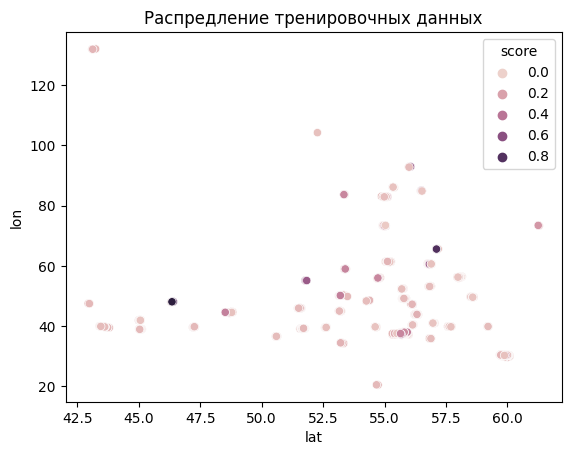

In [71]:
sns.scatterplot(data=train, x=train.lat, y=train.lon, hue=train.score).set_title("Распредление тренировочных данных")

Text(0.5, 1.0, 'Распредление тестовых данных')

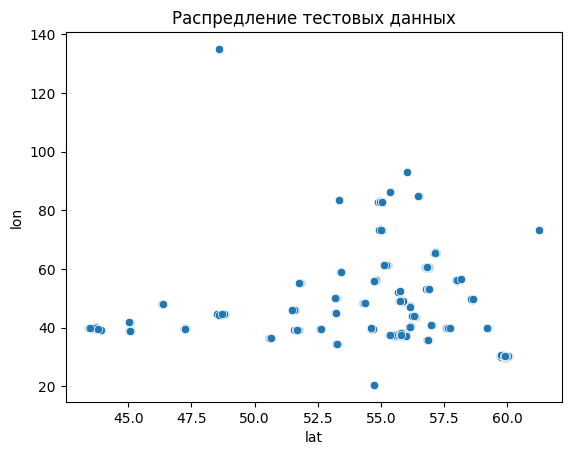

In [62]:
sns.scatterplot(data=test, x=test.lat, y=test.lon).set_title("Распредление тестовых данных")

Text(0.5, 1.0, 'Распределение координат в дополнительных данных')

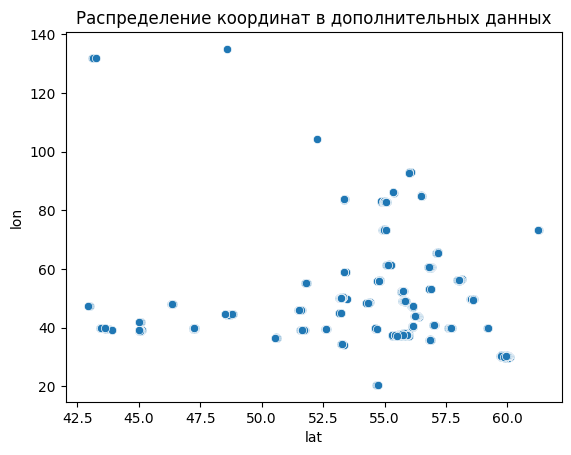

In [22]:
sns.scatterplot(data=features, x=features.lat, y=features.lon).set_title("Распределение координат в дополнительных данных")

Теперь давайте подтвердим нашу гипотезу статистическим тестом

In [125]:
len(list(train["lat"])), len(list(test["lat"]))

(3084, 1029)

In [126]:
statistic, p_value = ks_2samp(np.array([list(features["lat"][:3084]), list(features["lon"][:3084])]).flatten(), np.array([list(train["lat"]), list(train["lon"])]).flatten())

# Оценка статистики и p-value
print("Статистика:", statistic)
print("p-value:", p_value)

Статистика: 0.00940337224383917
p-value: 0.9479711279313955


In [127]:
statistic, p_value = ks_2samp(np.array([list(features["lat"][:1029]), list(features["lon"][:1029])]).flatten(), np.array([list(test["lat"]), list(test["lon"])]).flatten())

# Оценка статистики и p-value
print("Статистика:", statistic)
print("p-value:", p_value)

Статистика: 0.0184645286686103
p-value: 0.8744221576434366


Так как и в тренировочной, и в тестовой выборке p-value выше критического уровня занчимости = 0.05, то гипотеза о схожести распределений не отвергается. Таким образом, для того, чтобы в train и test добавить новые признаки, будем брать те объекты с признаками 0:362 из features, координаты которых наиболее близки по евклидову расстоянию к объектам из train и test. Для того, чтобы один и тот же объект не попал в обе выборки, будем добавлять в тренировочную выборку случайный шум, нормально распределенный

In [73]:
features.drop(['lat', 'lon'], axis=1)

,0,1,2,3,4,5,6,7,8,9,...,353,354,355,356,357,358,359,360,361,362
0,0.411159,0.360032,0.350883,0.476389,0.373542,0.399907,0.397579,0.486442,0.145445,0.045482,...,0.041906,0.045916,0.085368,0.093044,0.014491,0.004091,0.043260,0.045916,0.060025,0.071592
1,0.500628,0.458489,0.522933,0.538892,0.482807,0.497257,0.541007,0.482956,0.144566,0.067666,...,0.041262,0.054171,0.066940,0.057510,0.007990,0.017897,0.042617,0.054171,0.047068,0.044251
2,0.450037,0.413593,0.445300,0.490658,0.403224,0.448099,0.516285,0.526028,0.148218,0.036163,...,0.044056,0.052290,0.126482,0.116896,0.006771,0.007329,0.045406,0.052290,0.088934,0.089945
3,0.160964,0.146153,0.301632,0.196871,0.157927,0.130723,0.246422,0.385300,0.152035,0.039675,...,0.043072,0.051181,0.042962,0.030555,0.010293,0.002216,0.044425,0.051181,0.030208,0.023510
4,0.102522,0.073835,0.270109,0.129343,0.106780,0.082463,0.201381,0.372377,0.144754,0.033495,...,0.047839,0.048137,0.135698,0.163684,0.009615,0.003579,0.049185,0.048137,0.095414,0.125946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3696,0.603469,0.427283,0.616920,0.787331,0.585380,0.572505,0.414610,0.439459,0.134337,0.155862,...,0.040365,0.049803,0.115943,0.086169,0.003115,0.002045,0.041721,0.049803,0.081524,0.066302
3697,0.111785,0.105864,0.223382,0.120843,0.107082,0.094998,0.371929,0.296617,0.139454,0.007171,...,0.254405,0.220451,0.510766,0.568700,0.401002,0.182376,0.445025,0.417609,0.599474,0.731169
3698,0.439632,0.425653,0.368872,0.489872,0.389968,0.428121,0.510918,0.351653,0.156700,0.026844,...,0.037683,0.046643,0.048304,0.046775,0.013543,0.009374,0.039043,0.046643,0.033964,0.035991
3699,0.189145,0.216876,0.354758,0.177157,0.151277,0.190271,0.238387,0.298505,0.125461,0.026945,...,0.052133,0.047801,0.065017,0.084407,0.001219,0.004602,0.053472,0.047801,0.045716,0.064947


In [79]:
for col in range(features.drop(['lat', 'lon'], axis=1).shape[1]):
    train[col] = None
    test[col] = None

c:\Users\Vitaliy\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  
c:\Users\Vitaliy\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  This is separate from the ipykernel package so we can avoid doing imports until


In [94]:
test = test.drop(['id'], axis=1)
test.iloc[0, 2:]

0      None
1      None
2      None
3      None
4      None
       ... 
358    None
359    None
360    None
361    None
362    None
Name: 0, Length: 363, dtype: object

In [114]:
def foo(X, features, err=False):
  for i in tqdm(range(X.shape[0])):
    elem = X[['lat', 'lon']].iloc[i]
    dist_best = 10**10
    for j in range(features.shape[0]):
      dist = distance.euclidean(elem, features[['lat', 'lon']].iloc[j])
      if dist < dist_best:
        dist_best = dist
        if err:
          X.iloc[i, 2:] = features.drop(['lat', 'lon'], axis=1).iloc[j] + np.random.normal(0, 0.01, 363)
        else:
          X.iloc[i, 2:] = features.drop(['lat', 'lon'], axis=1).iloc[j]


In [95]:
foo(test, features)

100%|██████████| 1029/1029 [27:48<00:00,  1.62s/it]


In [120]:
test.head()

,lat,lon,0,1,2,3,4,5,6,7,...,353,354,355,356,357,358,359,360,361,362
0,55.782276,49.148234,0.16091,0.185747,0.272046,0.111733,0.119532,0.138536,0.264281,0.278465,...,0.055505,0.069654,0.089367,0.11612,0.019067,0.015962,0.048719,0.073477,0.08203,0.081254
1,56.841500,35.853059,0.166871,0.174395,0.287856,0.145754,0.158188,0.161419,0.181336,0.451391,...,0.011615,0.034577,0.038452,0.006511,0.009597,0.012262,0.228213,0.221296,0.345349,0.406033
2,55.356780,86.156697,0.072638,0.091584,0.268234,0.050498,0.056631,0.043274,0.151722,0.140927,...,0.221319,0.125508,0.430206,0.485859,0.156754,0.04877,0.343025,0.320527,0.446409,0.669228
3,56.755087,60.703962,0.197801,0.222455,0.322239,0.205953,0.191035,0.187394,0.397353,0.308534,...,0.009528,0.029614,-0.004461,0.01486,-0.003061,-0.011473,0.011744,0.015763,-0.003406,0.00462
4,59.907438,30.250297,0.395923,0.372964,0.344465,0.454425,0.334502,0.367879,0.486317,0.275945,...,0.033689,0.040994,0.022973,0.039698,-0.00242,0.013949,0.027304,0.042859,0.019979,0.029613


In [115]:
train = train.drop(['id', 'score'], axis=1)
train.iloc[0, 2:]

0      None
1      None
2      None
3      None
4      None
       ... 
358    None
359    None
360    None
361    None
362    None
Name: 0, Length: 363, dtype: object

In [117]:
foo(train, features, err=True)

100%|██████████| 3084/3084 [1:32:21<00:00,  1.80s/it]


In [119]:
train.head()

,lat,lon,0,1,2,3,4,5,6,7,...,353,354,355,356,357,358,359,360,361,362
0,56.228300,43.945535,0.142364,0.148692,0.204637,0.145253,0.11173,0.126452,0.244544,0.284906,...,0.04151,0.040116,0.03481,0.027075,0.022781,0.005567,0.054203,0.028645,0.023584,0.031518
1,56.834244,53.141543,0.074869,0.10803,0.152546,0.098818,0.10741,0.084436,0.173914,0.444763,...,0.055461,0.057672,0.117753,0.122291,0.03223,0.010933,0.044964,0.045773,0.079704,0.109334
2,45.042299,41.990170,0.159353,0.138113,0.329255,0.165796,0.149836,0.142065,0.304301,0.386269,...,0.064538,0.068405,0.096591,0.113503,0.004057,0.014506,0.077779,0.073423,0.061116,0.083137
3,59.849408,30.387762,0.424389,0.283321,0.40994,0.51316,0.426514,0.418395,0.39788,0.563465,...,0.037558,0.048526,0.142841,0.152277,0.013541,-0.002327,0.014642,0.047502,0.08743,0.118328
4,59.839643,30.304308,0.495277,0.363689,0.5265,0.536319,0.512105,0.500205,0.320289,0.550483,...,0.067051,0.046509,0.152099,0.113321,0.022032,0.013857,0.025298,0.07282,0.096626,0.100272


In [161]:
for col in train.columns:
    if type(col) != str:
        train.rename(columns={col : str(col)}, inplace=True)

for col in test.columns:
    if type(col) != str:
        train.rename(columns={col : str(col)}, inplace=True)

In [162]:
X_train, X_val, y_train, y_val = train_test_split(train, y, test_size=0.3, random_state=42)

In [163]:
print(f"Лучшее качество - {fit_predict(X_train, X_val, y_train, y_val)}")

Лучшее качество - [0.06151133346904673, <catboost.core.CatBoostRegressor object at 0x000001EEF237F788>]


Первоначальная модель показала качество лучше, переберем гиперпараметры у RandomForest

In [187]:
X, y = train2.drop(["id", "score"], axis=1), train2.score
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [188]:
from sklearn.model_selection import GridSearchCV

In [208]:
param_grid = {
    'max_depth': [5, 10, 20, 30, 50],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4]
}

In [209]:
clf = RandomForestRegressor(criterion='mae')

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)

print("Best MAE: ", grid_search.best_score_)

c:\Users\Vitaliy\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


Best parameters:  {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best MAE:  0.05140133548925052


Без подбора гиперпараметров качество все равно лучше

In [220]:
id, X_test = test2.id, test2.drop(['id'], axis=1)

In [221]:
clf = RandomForestRegressor()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

In [223]:
ans = pd.DataFrame({
    'id': list(id),
    'score':pred
})

In [224]:
ans

,id,score
0,3084,0.080310
1,3085,0.089597
2,3086,0.090060
3,3087,0.098143
4,3088,0.094620
...,...,...
1024,4108,0.096561
1025,4109,0.479751
1026,4110,0.247933
1027,4111,0.163678


In [228]:
ans.to_csv("submission.csv", index=False)